In [5]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]



We are dropping the first 3 columns as they are of no use in predictions in  our model

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


Geogaphy and Gender are categorical features hence we have to convert into numerical using get dummies

In [10]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [11]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [12]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [13]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
#used to build the neural networks(flow or graph in terms of tf)
from keras.layers import Dense
#used to build hidden layers


In [19]:
# Initialising the ANN
classifier = Sequential()

In [23]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

Usually relu is used in initial layers and sigmoid in the last layer

In [24]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [25]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [26]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 271us/step - loss: 0.5061 - accuracy: 0.7962 - val_loss: 0.5101 - val_accuracy: 0.7910
Epoch 2/100
5359/5359 [==============================] - 1s 163us/step - loss: 0.5017 - accuracy: 0.7962 - val_loss: 0.5042 - val_accuracy: 0.7910
Epoch 3/100
5359/5359 [==============================] - 1s 175us/step - loss: 0.4938 - accuracy: 0.7962 - val_loss: 0.4945 - val_accuracy: 0.7910
Epoch 4/100
5359/5359 [==============================] - 1s 162us/step - loss: 0.4815 - accuracy: 0.7962 - val_loss: 0.4804 - val_accuracy: 0.7910
Epoch 5/100
5359/5359 [==============================] - 1s 181us/step - loss: 0.4667 - accuracy: 0.7962 - val_loss: 0.4687 - val_accuracy: 0.7910
Epoch 6/100
5359/5359 [==============================] - 1s 190us/step - loss: 0.4553 - accuracy: 0.7962 - val_loss: 0.4610 - val_accuracy: 0.7910
Epoch 7/100
5359/5359 [==============================] - 1s 153us/step

**We have got an acuuraccy of 87% on training data and validation accuraccy of 85%**

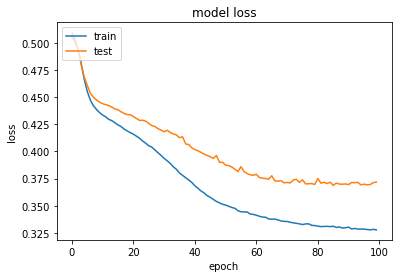

In [28]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1506,  101],
       [ 198,  195]])

In [33]:

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8505

We just randomly used a ANN now we can select the best paramaters by using hyper parameter tuning

In [34]:

## Perform Hyperparameter Optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid


In [36]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.2))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.2))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [38]:
model = KerasClassifier(build_fn=create_model)

In [47]:
layers = [(20), (40, 20), (45, 30, 15),(30,10),(20,10,5)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128], epochs=[100])

In [48]:
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,cv=5)


In [49]:
grid_result = grid.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


Streaming output truncated to the last 5000 lines.
6400/6400 [==============================] - 0s 14us/step - loss: 0.5006 - accuracy: 0.7975
Epoch 14/100
6400/6400 [==============================] - 0s 13us/step - loss: 0.4967 - accuracy: 0.7975
Epoch 15/100
6400/6400 [==============================] - 0s 13us/step - loss: 0.4938 - accuracy: 0.7975
Epoch 16/100
6400/6400 [==============================] - 0s 13us/step - loss: 0.4867 - accuracy: 0.7973
Epoch 17/100
6400/6400 [==============================] - 0s 14us/step - loss: 0.4832 - accuracy: 0.7978
Epoch 18/100
6400/6400 [==============================] - 0s 13us/step - loss: 0.4784 - accuracy: 0.7973
Epoch 19/100
6400/6400 [==============================] - 0s 14us/step - loss: 0.4749 - accuracy: 0.7975
Epoch 20/100
6400/6400 [==============================] - 0s 12us/step - loss: 0.4685 - accuracy: 0.7978
Epoch 21/100
6400/6400 [==============================] - 0s 12us/step - loss: 0.4676 - accuracy: 0.7977
Epoch 22/100
6400

In [50]:
print("Best Score:",grid_result.best_score_)
print("-------------------------------------------------------------")
print("Best Parameters selected:",grid_result.best_params_)

Best Score: 0.8602499961853027
-------------------------------------------------------------
Best Parameters selected: {'layers': (40, 20), 'epochs': 100, 'batch_size': 128, 'activation': 'relu'}
